Define a `Point` structure to couple two dimentional data.

In [3]:
struct Point
    x::Float64
    y::Float64
end

Define a function to calculate the divided difference of a given point set.

In [7]:
function divdiff(points::Vector{Point})::Float64
    if length(points) == 0
        return 0.0
    end
    
    if length(points) == 1
        return points[1].y
    end
    
    return (divdiff(points[2:end]) - divdiff(points[1:end-1])) / (points[end].x - points[1].x)
end

divdiff (generic function with 1 method)

Define a newton polynomial to compute a value based on known data to interpolate `x`.

In [11]:
function newton(points::Vector{Point}, x::Float64)::Float64
    ret::Float64 = 0.0
    for i in 1:length(points)
        tmp::Float64 = divdiff(points[1:i])
        for j in 1:i-1
            tmp *= x - points[j].x
        end
        ret += tmp
    end
    
    return ret
end

newton (generic function with 1 method)

Plot a graph to see the result.

In [13]:
data::Vector{Point} = [
    Point(-1.0, 9.0),
    Point(0.0, 5.0),
    Point(1.0, 3.0),
]

3-element Vector{Point}:
 Point(-1.0, 9.0)
 Point(0.0, 5.0)
 Point(1.0, 3.0)

In [9]:
using Plots

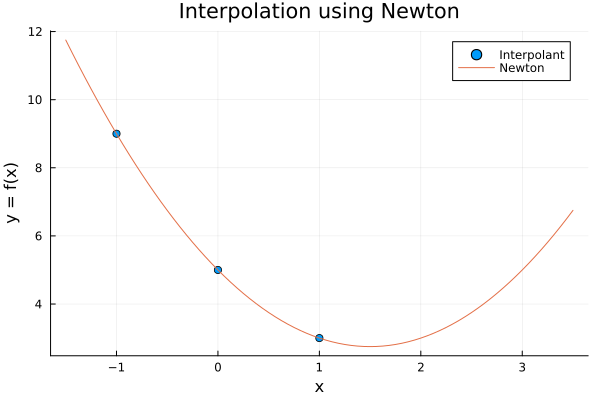

In [19]:
Xs = -1.5:0.0625:3.5
y = [newton(data, x) for x in Xs]

scatter(
    [p.x for p in data],
    [p.y for p in data],
    label="Interpolant",
    xlabel="x",
    ylabel="y = f(x)",
    title="Interpolation using Newton",
)
plot!(Xs, y, label="Newton")